# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [25]:
#Who: the insurance company's staff 
#What:the customer from auto insurance who may fraud insurance.
# How: we can use the customer information to ensure the risk of the customer fraud insurance.

# 3. Homework - work with your own data

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:



- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [27]:
df = pd.read_csv("autoinsurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [28]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [29]:
#Duplicate
duplicates = df.duplicated()
duplicates.any

<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
15415    False
15416    False
15417    False
15418    False
15419    False
Length: 15420, dtype: bool>

What are the mean, median, and mode of each column?

In [30]:
df_mean = df.mean(numeric_only=True)
df_mean

WeekOfMonth              2.788586
WeekOfMonthClaimed       2.693969
Age                     39.855707
PolicyNumber          7710.500000
RepNumber                8.483268
Deductible             407.704280
DriverRating             2.487808
Year                  1994.866472
dtype: float64

In [31]:
df_median = df.median(numeric_only=True)
df_median

WeekOfMonth              3.0
WeekOfMonthClaimed       3.0
Age                     38.0
PolicyNumber          7710.5
RepNumber                8.0
Deductible             400.0
DriverRating             2.0
Year                  1995.0
dtype: float64

In [32]:
df_mode = df.mode()
df_mode.iloc[0]

Month                                 Jan
WeekOfMonth                           3.0
DayOfWeek                          Monday
Make                              Pontiac
AccidentArea                        Urban
DayOfWeekClaimed                   Monday
MonthClaimed                          Jan
WeekOfMonthClaimed                    2.0
Sex                                  Male
MaritalStatus                     Married
Age                                  30.0
Fault                       Policy Holder
PolicyType              Sedan - Collision
VehicleCategory                     Sedan
VehiclePrice             20,000 to 29,000
PolicyNumber                            1
RepNumber                             7.0
Deductible                          400.0
DriverRating                          1.0
Days:Policy-Accident         more than 30
Days:Policy-Claim            more than 30
PastNumberOfClaims                 2 to 4
AgeOfVehicle                      7 years
AgeOfPolicyHolder                3

Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?


In [33]:
df_NA = df.isnull().values.any()
df_NA

np.False_


- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)


In [34]:
df_age = df["Age"].sort_values()
df_age

12031     0
9540      0
9528      0
8087      0
8071      0
         ..
7757     80
6789     80
6352     80
11813    80
11705    80
Name: Age, Length: 15420, dtype: int64

In [35]:
df_age_0 = df[df["Age"]==0]
df_age_0
# There are 330 rows' age is 0.

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision,No
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils,No



- Encode any categorical variables (e.g. with one-hot encoding.)


In [39]:
one_hot = pd.get_dummies(df, columns=["FraudFound"])
df["FraudFound"] = df["FraudFound"].map({"No": 0, "Yes": 1})
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


In [ ]:
# This dataset is useable. It does not contain null value or imbalance column.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

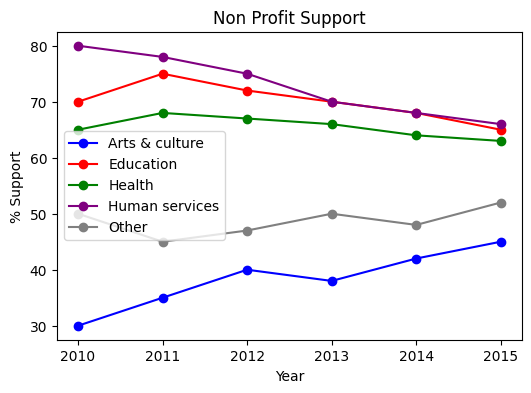

In [38]:
years = np.array([2010, 2011, 2012, 2013, 2014, 2015])

arts_culture = np.array([30, 35, 40, 38, 42, 45])
education = np.array([70, 75, 72, 70, 68, 65])
health = np.array([65, 68, 67, 66, 64, 63])
human_services = np.array([80, 78, 75, 70, 68, 66])
other = np.array([50, 45, 47, 50, 48, 52])

plt.figure(figsize=(6, 4))
plt.plot(years, arts_culture, marker='o', label='Arts & culture', color='blue')
plt.plot(years, education, marker='o', label='Education', color='red')
plt.plot(years, health, marker='o', label='Health', color='green')
plt.plot(years, human_services, marker='o', label='Human services', color='purple')
plt.plot(years, other, marker='o', label='Other', color='gray')

plt.title("Non Profit Support")
plt.xlabel("Year")
plt.ylabel("% Support")
plt.legend()
